([], [])

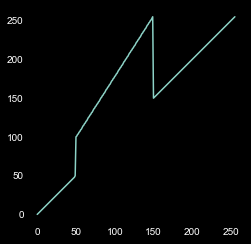

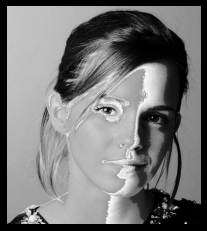

In [10]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


img_orig = cv.imread('emma_gray.jpg')

t1=np.linspace(0,50,50)
t2=np.linspace(100,255,100)
t3=np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax =plt.subplots()
ax.plot(t)
ax.set_aspect('equal')


transformed = cv.LUT(img_orig,t)
f, axarr = plt.subplots()
axarr.imshow(transformed)
axarr.set_xticks([]), axarr.set_yticks([])




([], [])

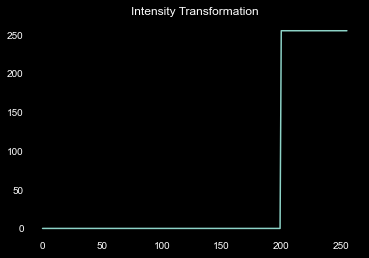

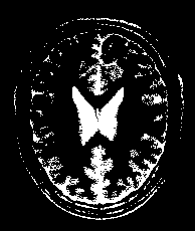

In [16]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('brain_proton_density_slice.png')
assert img_orig is not None

t1 =  np.array([0 for i in range(0,200)])
t2 =  np.array ([255 for i in  range (200,256)])
transform  = np.concatenate((t1,t2),axis =0)
assert len(transform)==256

fig,ax =plt.subplots()
ax.plot(transform)
ax.set_title("Intensity Transformation")

trandformed_img = cv.LUT(img_orig,transform)

fig,ax =plt.subplots()
plt.imshow(trandformed_img)
ax.set_xticks([]), ax.set_yticks([])




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], [])

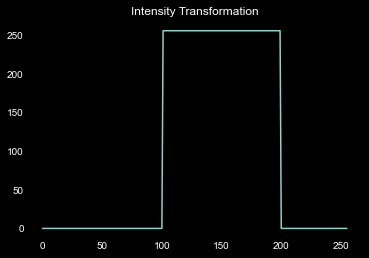

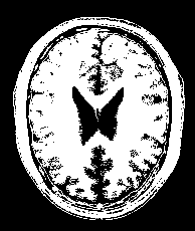

In [15]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('brain_proton_density_slice.png')
assert img_orig is not None

t1 =  np.array([0 for i in range(0,101)])
t2 =  np.array ([256 for i in  range (101,200)])
t3 =  np.array ([0 for i in  range (200,256)])

transform  = np.concatenate((t1,t2,t3),axis =0)
assert len(transform)==256

fig,ax =plt.subplots()
ax.plot(transform)
ax.set_title("Intensity Transformation")


trandformed_img = cv.LUT(img_orig,transform)

fig,ax =plt.subplots()
plt.imshow(trandformed_img)
ax.set_xticks([]), ax.set_yticks([])

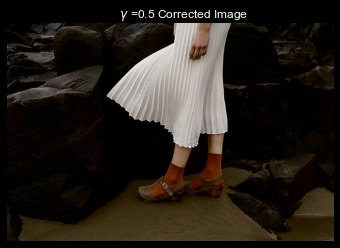

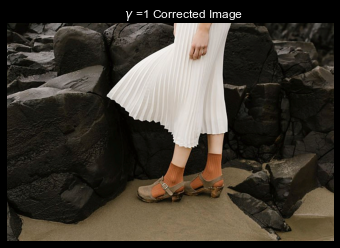

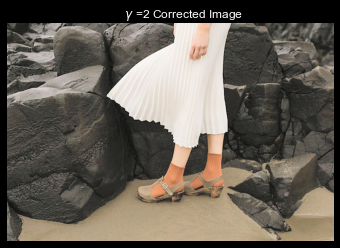

In [34]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert img is not None

#img_LAB = cv.cvtColor(img, cv.COLOR_BGR2LAB)

gamma_list = [0.5,1,2]
for gamma in gamma_list:
    img_LAB = cv.cvtColor(img, cv.COLOR_BGR2LAB)

    table = np.array([(i/255.0)**(1/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
    
    L , A, B = cv.split(img_LAB)
    L_new = cv.LUT(L,table)
    img_transformed = cv.merge((L_new,A,B))
    fig , ax =  plt.subplots()
    ax.set_xticks([]), ax.set_yticks([])
    ax.imshow(cv.cvtColor(img_transformed,cv.COLOR_LAB2RGB))
    ax.set_title("	$\gamma$ ={} Corrected Image".format(gamma))

